In [29]:
%reload_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

from scipy.stats import pearsonr, spearmanr
import numpy as np

from src.data.part2_helper import *

## Anchoring Effect Analysis

In [2]:
RateBeer_path = 'data/RateBeer/ratings.csv'
BeerAdvocate_path = 'data/BeerAdvocate/ratings.csv'

The first thing we want to do is to observe the data, as it is very noisy we smooth it using a moving average.

On this two cherry picked plots, we observe a tendancy:
- When the firsts rating are high the following tend decrease
- When the firsts rating are low the following tend increase

They always see the go closer to the average rating of 3 with time.

In [3]:
min_count = 3000

# create dataset with ratings and date
RateBeerRatingDate_df = loadRatingDate(RateBeer_path, min_count)
BeerAdvocateRatingDate_df = loadRatingDate(BeerAdvocate_path, min_count)

# merge the ordered rating for each beer in a list
RateBeerRatingDateList_df = RateBeerRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  rating=('rating', list))
BeerAdvocateRatingDateList_df = BeerAdvocateRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  rating=('rating', list))

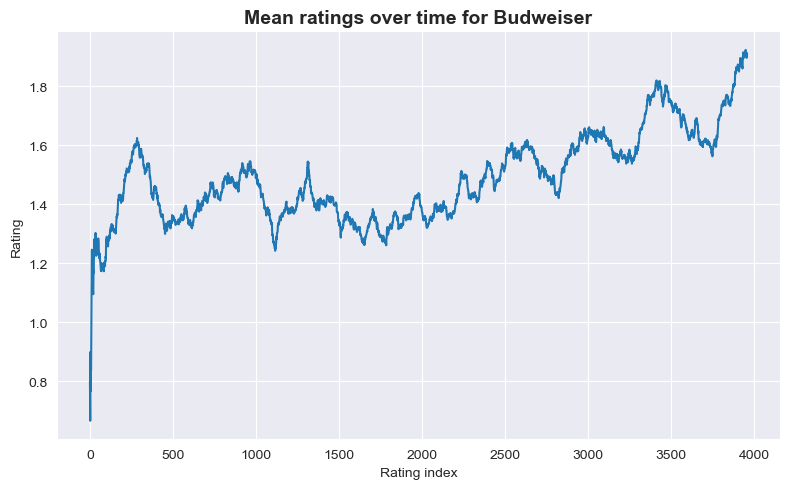

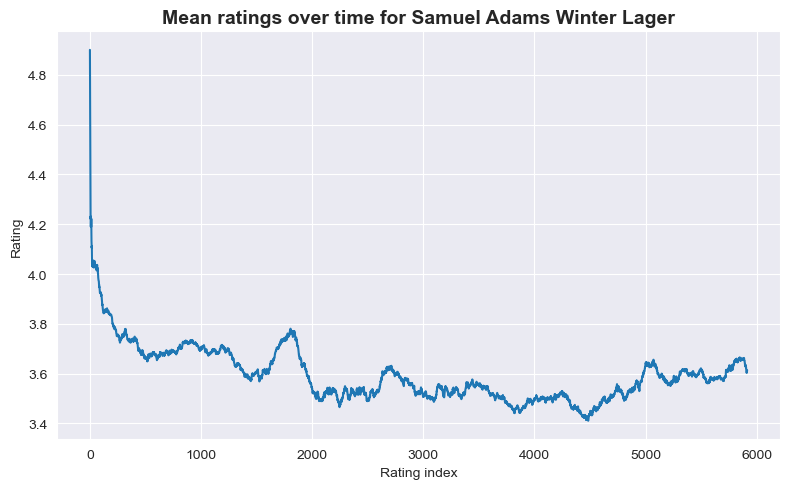

In [15]:
plot_moving_average_unique(RateBeerRatingDateList_df, 12, 200)
plot_moving_average_unique(BeerAdvocateRatingDateList_df, 14, 200)

To see if the previously observed tendancy really exist, we want to plot the average distance between every rating and the average rating of 3, for every popular beer on the dataset.
We choose only the popular beers because we need many rating to observe the plot over the rating index.

On these two lot we can clearly observe that the first rating tend to be more extreme and they get closer to 3 with time.

In [5]:
RateBeerRatingDate_df['abs_diff'] = abs(RateBeerRatingDate_df['rating'] - 3)
BeerAdvocateRatingDate_df['abs_diff'] = abs(BeerAdvocateRatingDate_df['rating'] - 3)

# merge the ordered rating for each beer in a list
RateBeerAbsDiffList_df = RateBeerRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  abs_diff=('abs_diff', list))
BeerAdvocateAbsDiffList_df = BeerAdvocateRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  abs_diff=('abs_diff', list))

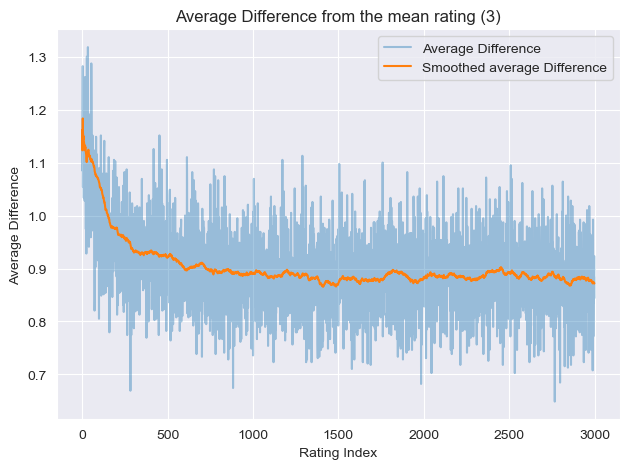

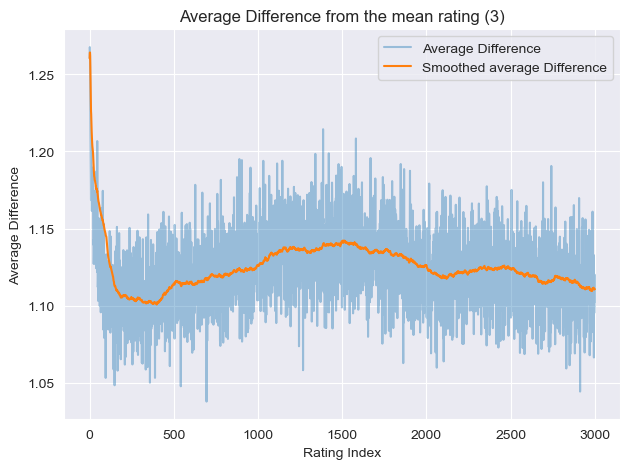

In [6]:
plot_smoothed_rating_diff(RateBeerAbsDiffList_df, min_count, 100)
plot_smoothed_rating_diff(BeerAdvocateAbsDiffList_df, min_count, 100)

In [16]:
# As we need the bro score we only use the BeerAdvocat ratings
first_vs_other_rating = load_data_first_rating(data_path=BeerAdvocate_path)

We plot the histogram of the firsts rating on every beer, and the overall rating.
We observe that the first rating are generally higher than the overall ratings.

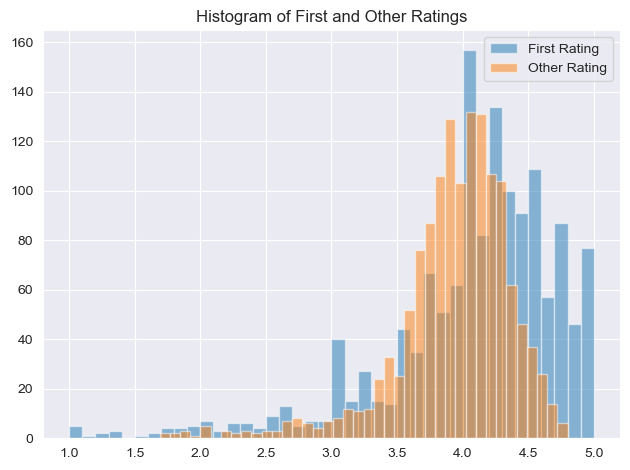

In [32]:
# plot a histogram of the first rating vs the average rating distributions
plt.hist(first_vs_other_rating['first_rating'], bins=40, alpha=0.5, label='First Rating')
plt.hist(first_vs_other_rating['other_rating'], bins=40, alpha=0.5, label='Other Rating')

plt.legend()
plt.title('Histogram of First and Other Ratings')
plt.tight_layout()
plt.show()

We want to see the correlation between the first rating goven to a beer and the overall rate of the same beer.
The correlation are significative but as the concerne the same beer this doesn't prove any anchoring effect

In [33]:
# perform both perarsonr and spearmanr test on these distributions
p_corr, p_p_value = pearsonr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating'])
s_corr, s_p_value = spearmanr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating'])
print(f'The correlation according to perarsonr test is {p_corr} with a p-value of {p_p_value}.')
print(f'The correlation according to spearmanr test is {s_corr} with a p-value of {s_p_value}.')

The correlation according to perarsonr test is 0.683000598567999 with a p-value of 1.662478409079184e-193.
The correlation according to spearmanr test is 0.5941634172208455 with a p-value of 9.632156923063058e-135.


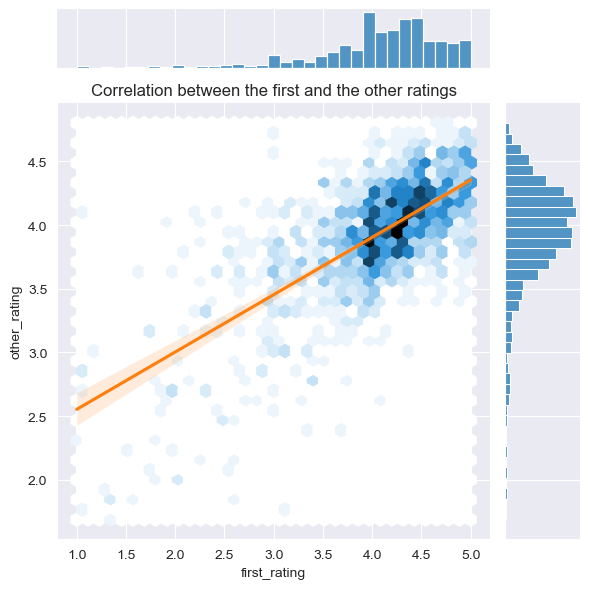

In [34]:
#  join plot of the correlation between first_rating and other_rating

sns.jointplot(x='first_rating', y='other_rating', data=first_vs_other_rating, kind='hex')
sns.regplot(x='first_rating', y='other_rating', data=first_vs_other_rating, scatter=False, color='#FF7F0E')
plt.title('Correlation between the first and the other ratings')

plt.tight_layout()
plt.show()

We want to compare the overall rating of a beer and the bro score.
We split our data frame in two groups : the group that had high and low first rating.
The idea is that if a beer has a high first rating, the anchoring effect will increase the overall rating, and it should be greater than the bros score (that we considered as accurate and unbiased), and on the other hand if the first rating are low, the overall rating should be below the bro score.

In [42]:
# load bros_score df
bro_score_per_beer = loadBrosScoreDf()

In [43]:
# separate in low vs high first rating groups
high_ratings_with_bros_score, low_ratings_with_bros_score = prepareHighVsLow(first_vs_other_rating, bro_score_per_beer, 4, 2)

/Users/romain/Desktop/ADA/Projet/GitHub/ada-2024-project-insightmakers24/src/data/part2_helper.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # calculate the diff between bros_score and average rating for both df
/Users/romain/Desktop/ADA/Projet/GitHub/ada-2024-project-insightmakers24/src/data/part2_helper.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_ratings_with_bros_score['bros_score_1_5']


In [44]:
# print the mean of both group difference with bro_score
high_groupe_global_diff = high_ratings_with_bros_score['rating_diff'].mean()
low_groupe_global_diff = low_ratings_with_bros_score['rating_diff'].mean()

print(f'We can see that the difference between the website rating and the bro score for the group of high first rating is {high_groupe_global_diff}.')
print(f'And for the group of low first rating is {low_groupe_global_diff}.')

We can see that the difference between the website rating and the bro score for the group of high first rating is 0.03636341364260558.
And for the group of low first rating is -0.16977814424927007.


In [50]:
# perform ttest on both diff lists
t_stat, p_value = ttest_ind(high_ratings_with_bros_score['rating_diff'], low_ratings_with_bros_score['rating_diff'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the two groups is significant.")
else:
    print("The is no significant difference between the two groupes.")


T-statistic: 4.020141537148968
P-value: 6.68234934448715e-05
The difference between the two groups is significant.


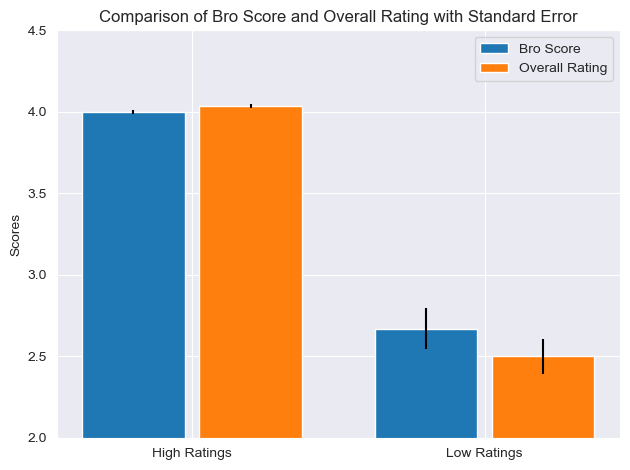

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# compute mean and std error by df
high_means = [
    high_ratings_with_bros_score['bros_score_1_5'].mean(),
    high_ratings_with_bros_score['other_rating'].mean()
]
high_stderr = [
    high_ratings_with_bros_score['bros_score_1_5'].std() / np.sqrt(len(high_ratings_with_bros_score)),
    high_ratings_with_bros_score['other_rating'].std() / np.sqrt(len(high_ratings_with_bros_score))
]

low_means = [
    low_ratings_with_bros_score['bros_score_1_5'].mean(),
    low_ratings_with_bros_score['other_rating'].mean()
]
low_stderr = [
    low_ratings_with_bros_score['bros_score_1_5'].std() / np.sqrt(len(low_ratings_with_bros_score)),
    low_ratings_with_bros_score['other_rating'].std() / np.sqrt(len(low_ratings_with_bros_score))
]

labels = ['High Ratings', 'Low Ratings']
x = np.arange(len(labels))
width = 0.35
gap = 0.05

fig, ax = plt.subplots()

# plot bars for both group
ax.bar(x - (width+gap)/2, [high_means[0], low_means[0]], width,
       yerr=[high_stderr[0], low_stderr[0]], label='Bro Score')

ax.bar(x + (width+gap)/2, [high_means[1], low_means[1]], width,
       yerr=[high_stderr[1], low_stderr[1]], label='Overall Rating')

# Customisation
ax.set_ylabel('Scores')
ax.set_title('Comparison of Bro Score and Overall Rating with Standard Error')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(2, 4.5)

plt.tight_layout()
plt.show()
